In [17]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_url = "./howpop_train.csv"
data = pd.read_csv(data_url)
data.shape

data.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [19]:
data.drop(
    filter(lambda c: c.endswith("_lognorm"), data.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет
data.describe().T
print(id(data))


2205142105984


In [20]:
data.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/314088/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [21]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (20, 10), "axes.titlesize": 18}
)

In [22]:
print(data.published.dtype)
data["published"] = pd.to_datetime(data.published, yearfirst=True)
print(data.published.dtype)

object
datetime64[ns]


In [23]:
data["year"] = [d.year for d in data.published]
data["month"] = [d.month for d in data.published]

data["dayofweek"] = [d.isoweekday() for d in data.published]
data["day"] = [d.day for d in data.published]
data["hour"] = [d.hour for d in data.published]



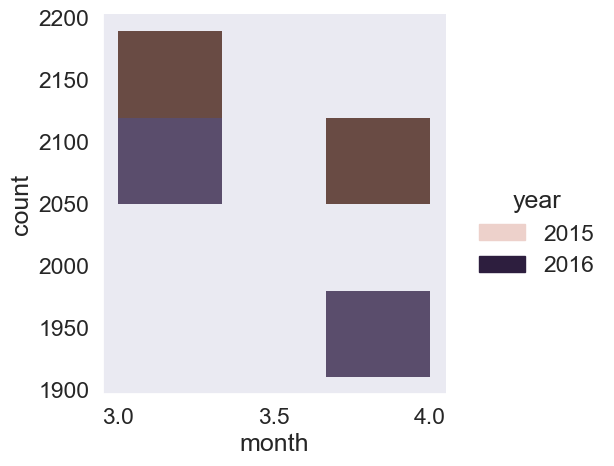

In [24]:
# май/апрель 2015/2016 в каком месяце и году больше всего публикаций
df = pd.DataFrame(data, columns=["post_id", "year", "month"])
df = df[((df["year"].isin([2015,2016])) & df["month"].isin([3,4]))]
df = df.groupby(["year", "month"]).count()
df.rename(columns={'post_id': 'count'}, inplace=True)
df

sns.displot(data=df, x="month", y="count", hue="year")


<Axes: xlabel='day', ylabel='count'>

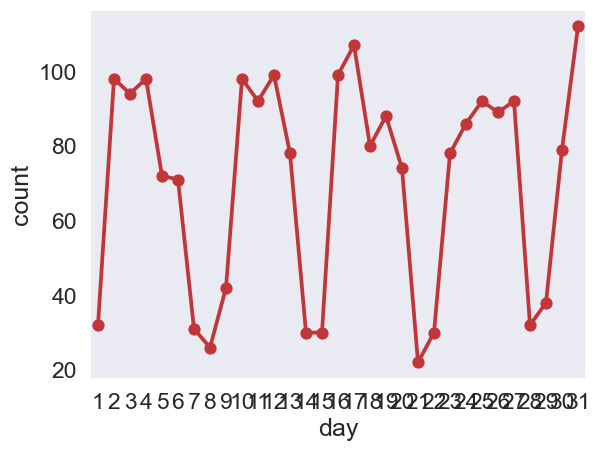

In [27]:
#2. Проанализируйте публикации в месяце из предыдущего вопроса
df_march_2015 = data[(data["year"] == 2015) & (data["month"] == 3)]
df_march_2015_1 = pd.DataFrame(df_march_2015, columns=["post_id", "day"])
df_march_2015_1 = df_march_2015_1.groupby(["day"]).count()

df_march_2015_1.rename(columns={"post_id": "count"}, inplace=True)

df_march_2015_1


sns.pointplot(data=df_march_2015_1, x="day", y="count")

                  post_id
domain       day         
geektimes.ru 1          6
             2         25
             3         29
             4         37
             5         31
...                   ...
habrahabr.ru 27        58
             28        17
             29        23
             30        52
             31        71

[62 rows x 1 columns]


<Axes: xlabel='day', ylabel='post_id'>

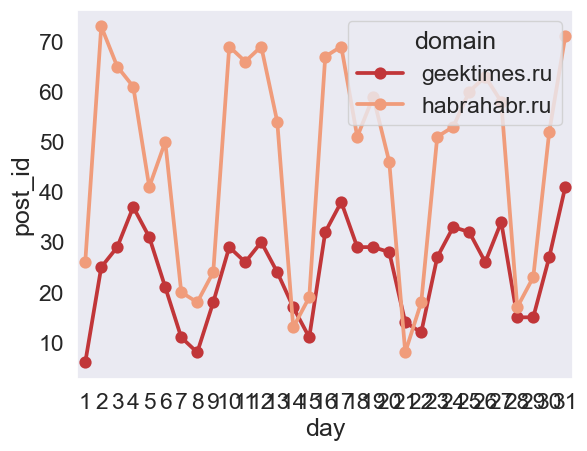

In [26]:
df_march_2015_2 = pd.DataFrame(df_march_2015, columns=["post_id", "day", "domain"])
df_march_2015_2 = df_march_2015_2.groupby(["domain","day"]).count()
print(df_march_2015_2)
sns.pointplot(data=df_march_2015_2, x="day", y="post_id",hue="domain")